In [2]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm
from keras.datasets import mnist 
from tensorflow.keras.optimizers import SGD

In [5]:
(trainX,trainy),(testX,testy) = mnist.load_data()

In [6]:
print(trainX.shape, trainy.shape)

(60000, 28, 28) (60000,)


In [7]:
print(testX.shape,testy.shape)

(10000, 28, 28) (10000,)


In [8]:
trainX[:10]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [9]:
trainy[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

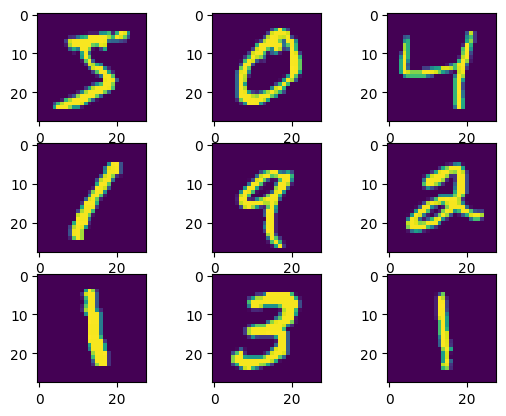

In [10]:
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(trainX[i])
plt.show()

In [11]:
trainy = to_categorical(trainy)
testy = to_categorical(testy)

In [12]:
# Step 2 - Building a model
def define_model():
  model = Sequential()
  model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',input_shape=(28,28,1)))
  model.add(MaxPooling2D((2,2)))
  model.add(Flatten())
  model.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
  model.add(Dense(10,activation='softmax'))
  opt = SGD(momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])
  return model

In [13]:
# Step 3 - Evaluation
def summarize_performance(scores):
  print("Accuracy: \nMean Score:",mean(scores),"\nStd:",std(scores)*100)

In [16]:
def run():
  (trainX,trainy),(testX,testy) = mnist.load_data()

  # reshape the data to have a single channel
  trainX = trainX.reshape((trainX.shape[0],28,28,1))
  testX = testX.reshape((testX.shape[0],28,28,1))

  # one hot encoding
  trainy = to_categorical(trainy)
  testy = to_categorical(testy)

  # normalize the values
  train_norm = trainX.astype('float32')
  test_norm = testX.astype('float32')
  trainX = train_norm/255.0
  testX = test_norm/255.0

  # model
  model = define_model()
  history=model.fit(trainX,trainy,epochs=10,batch_size=32, validation_data=(testX,testy))
  return history
  # evaluate
  #print(model.evaluate(testX,testy))

Epoch 1/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1540 - accuracy: 0.9541 - val_loss: 0.0593 - val_accuracy: 0.9820
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0537 - accuracy: 0.9841 - val_loss: 0.0503 - val_accuracy: 0.9836
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0356 - accuracy: 0.9891 - val_loss: 0.0449 - val_accuracy: 0.9845
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0242 - accuracy: 0.9926 - val_loss: 0.0443 - val_accuracy: 0.9866
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0174 - accuracy: 0.9946 - val_loss: 0.0446 - val_accuracy: 0.9853
Epoch 6/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0117 - accuracy: 0.9970 - val_loss: 0.0422 - val_accuracy: 0.9858
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0076 - accuracy: 0.9984 - val_loss: 0.0399 -

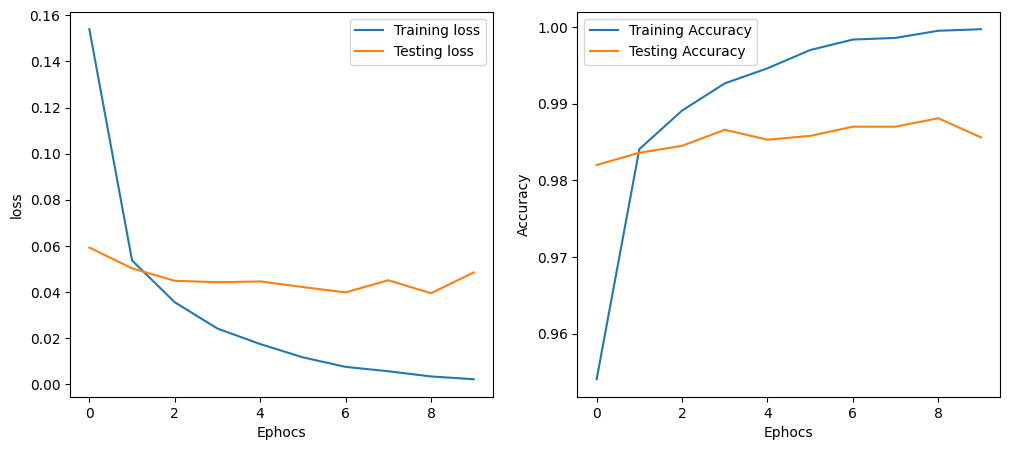

In [17]:
history=run()
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Testing loss')
plt.xlabel('Ephocs')
plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Testing Accuracy')
plt.xlabel('Ephocs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()